In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [161]:
lamarck = pd.read_csv("./rawdata_lamarck_all_MMMS.csv", header=0, index_col=[0,1])
print(lamarck)

path="/Users/meijiaojiao/Desktop/Evolution_algorithm/Experiment10/SSGA/rawdata_SSGA_all_MMMS.csv"
SSGA = pd.read_csv(path,header=0,index_col=[0,1])
print(SSGA.shape)

path="/Users/meijiaojiao/Desktop/Evolution_algorithm/Experiment10/Baldwin/rawdata_baldwin_all_MMMS.csv"
baldwin = pd.read_csv(path,header=0,index_col=[0,1])
print(baldwin.shape)

df_together = pd.concat([lamarck,SSGA,baldwin],axis=0,keys=["Lamarck","SSGA","Baldwin"])
# df_together = pd.concat([lamarck,SSGA],axis=0,keys=["Lamarck","SSGA"])
print(df_together.shape)
df_together = df_together.applymap(lambda x:x if not '%' in str(x) else x.replace('%',''))
print(df_together.dtypes)

                     590        593        579        588        589  \
Function                                                               
F1       Max    0.499985   0.497061   0.498842   0.499870   0.498412   
         Mean   0.485015   0.480019   0.479971   0.486716   0.482175   
         Min    0.439790   0.441634   0.452983   0.470229   0.454361   
         Std    0.021323   0.016026   0.015359   0.009002   0.013959   
F2       Max    0.499524   0.499152   0.499383   0.498101   0.498474   
...                  ...        ...        ...        ...        ...   
F22      Std    1.667775   2.232411   2.554224   2.232410   0.000041   
F23      Max   -5.128481  -5.128481 -10.536251  -5.128481 -10.536262   
         Mean  -9.459446  -9.454750 -10.536302  -9.995511 -10.536321   
         Min  -10.536375 -10.536393 -10.536363 -10.536338 -10.536390   
         Std    2.270217   2.280144   0.000042   1.710100   0.000046   

                     591        576        587        569      

         Function          
Lamarck  F1        Max  590    0.499985
                        593    0.497061
                        579    0.498842
                        588    0.499870
                        589    0.498412
                                 ...   
Baldwin  F23       Std  562    2.270200
                        575    1.876600
                        573    1.695200
                        552    0.000047
                        555    0.000037
Length: 5520, dtype: float64

,Function,Combinations,Mode,Times,solutions
0,F1,590,Lamarck,Max,0.499985
1,F1,593,Lamarck,Max,0.497061
2,F1,579,Lamarck,Max,0.498842
3,F1,588,Lamarck,Max,0.499870
4,F1,589,Lamarck,Max,0.498412
...,...,...,...,...,...
5515,F23,562,Baldwin,Std,2.270200
5516,F23,575,Baldwin,Std,1.876600
5517,F23,573,Baldwin,Std,1.695200
5518,F23,552,Baldwin,Std,0.000047


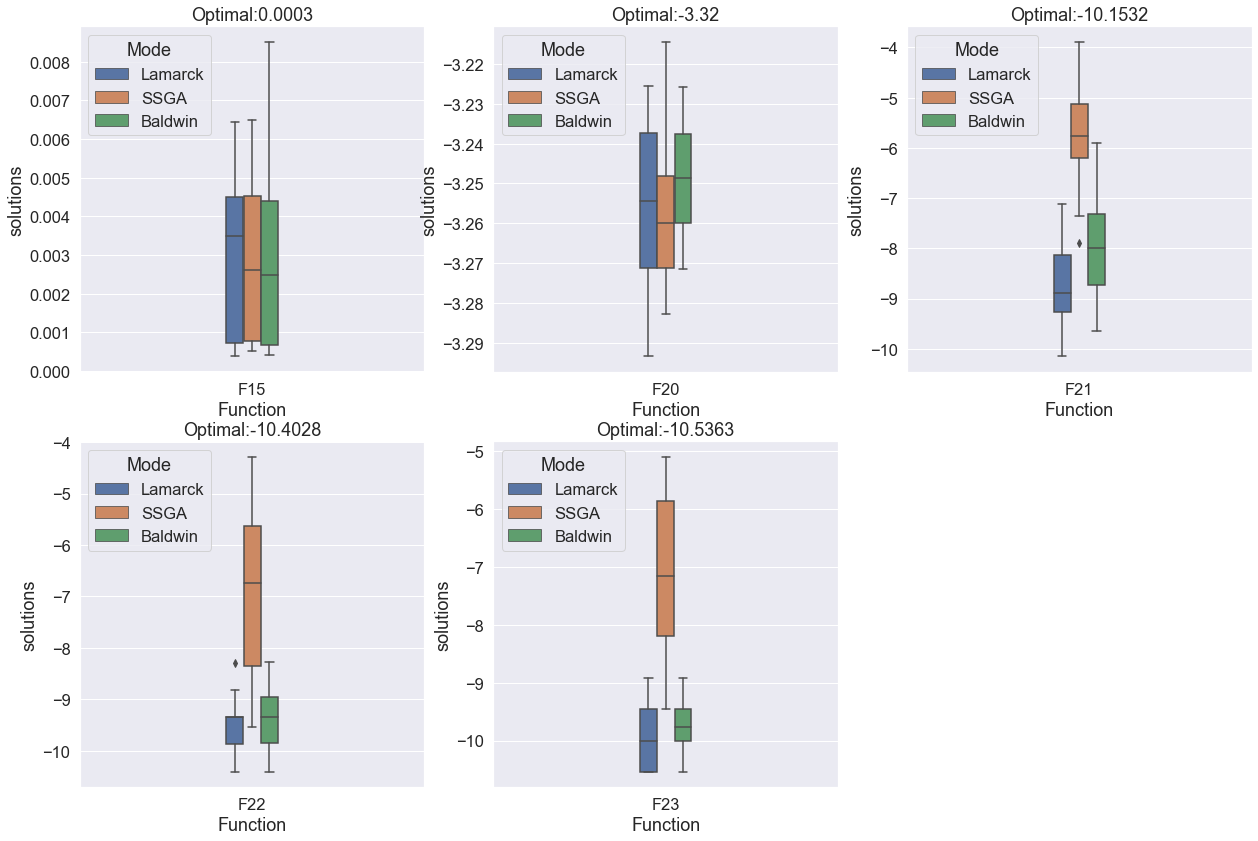

In [197]:
import seaborn as sns
dataframe = df_together
dataframe = dataframe.stack()
display(dataframe)
dataframe = dataframe.rename_axis(index=["Mode","Function","Times","Combinations"])
dataframe = dataframe.reset_index(level=[0, 2], name="solutions")
dataframe["solutions"] = pd.to_numeric(dataframe["solutions"])
dataframe = dataframe.reset_index(drop=False)
display(dataframe)
function_list = ["F" + str(i) for i in [15,20,21,22,23]]
# opt = [0, 0, 0, 0, 0, 0, 0, -20949, 0, 0, 0, 0, 0, 1, 0.0003, -1.0316, 0.398, 3, -3.86, -3.32,-10.1532, -10.4028, -10.5363]
opt = [ 0.0003, -3.32,-10.1532, -10.4028, -10.5363]
def show_graph(dataframe):
    sns.set(font_scale=1.5)
    dist_cols = 3
    dist_rows = 2
    plt.figure(figsize=(7 * dist_cols, 7 * dist_rows))
    i = 1
    for function in function_list:
        dataf = dataframe[dataframe["Function"] == function]
        data = dataf[dataf["Times"] == ("Mean" or "Min")]
        plt.subplot(dist_rows, dist_cols, i)
        # sns.violinplot(data=dataf, y="solutions",palette="viridis",x="Function",hue="Mode",split=True,inner="stick")
        ax= sns.boxplot(data=data, y="solutions",x="Function",hue="Mode",width=0.15)
        sns.move_legend(ax, "upper left", bbox_to_anchor=(0, 1))
        # plt.axhline(y=opt[i-1],color="red")
        # sns.violinplot(data=dataf, y="solutions",x="Function",hue="Mode")
        plt.title(f"Optimal:{opt[i-1]}")
        # plt.title(f"Optimal:{opt[i-1]}")
        # ax.set_yticklabels(ax.get_yticks(), size = 20)
        plt.ylabel("solutions")
        i = i + 1
    plt.savefig("./together_solutions_12{0}.png".format("lamarck_SSGA_Baldwin"), dpi=1200, bbox_inches='tight')
    plt.show()
show_graph(dataframe=dataframe)

In [ ]:
import seaborn as sns
dataframe = df_together
dataframe = dataframe.stack()
display(dataframe)
dataframe = dataframe.rename_axis(index=["Mode","Function","Times","Combinations"])
dataframe = dataframe.reset_index(level=[0, 2], name="solutions")
dataframe["solutions"] = pd.to_numeric(dataframe["solutions"])
dataframe = dataframe.reset_index(drop=False)
display(dataframe)
function_list = ["F" + str(i) for i in range(1, 24, 1)]
opt = [0, 0, 0, 0, 0, 0, 0, -20949, 0, 0, 0, 0, 0, 1, 0.0003, -1.0316, 0.398, 3, -3.86, -3.32,-10.1532, -10.4028, -10.5363]
def show_graph(dataframe):
    sns.set()
    dist_cols = 4
    dist_rows = 3
    plt.figure(figsize=(6 * dist_cols, 4 * dist_rows))
    i = 1
    for function in function_list[12:]:
        dataf = dataframe[dataframe["Function"] == function]
        # data = dataf[dataf["Times"] == ("Mean" or "Min")]
        plt.subplot(dist_rows, dist_cols, i)
        # sns.violinplot(data=dataf, y="solutions",palette="viridis",x="Function",hue="Mode",split=True,inner="stick")
        sns.boxplot(data=dataf, y="solutions",x="Function",hue="Mode",width=0.15)
        # plt.axhline(y=opt[i-1],color="red")
        # sns.violinplot(data=dataf, y="solutions",x="Function",hue="Mode")
        plt.title(f"Optimal:{opt[i-1]}")
        # plt.title(f"Optimal:{opt[i-1]}")
        # ax.set_yticklabels(ax.get_yticks(), size = 20)
        plt.ylabel("solutions")
        i = i + 1
    plt.savefig("./together_solutions_12{0}.png".format("lamarck_SSGA_Baldwin"), dpi=1200, bbox_inches='tight')
    plt.show()
show_graph(dataframe=dataframe)

In [163]:
global_opt = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, -20949.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.5, 0.00034, -1.03155, 0.3985, 3.5, -3.855, -3.315,
                    -10.15315, -10.40275, -10.53625]
df_opt = dataframe.copy()
cdf=[]
for f in range(1,24,1):
    opt = global_opt[f-1]
    f = "F"+str(f)
    dataf = df_opt[df_opt["Function"] == f]
    dataf["solutions"] = opt
    cdf.append(dataf)
cdf = pd.concat(cdf,axis=0)
cdf.rename(columns={'solutions': 'optimal'}, inplace=True)
print(cdf)

     Function Combinations     Mode Times   optimal
0          F1          590  Lamarck   Max   0.50000
1          F1          593  Lamarck   Max   0.50000
2          F1          579  Lamarck   Max   0.50000
3          F1          588  Lamarck   Max   0.50000
4          F1          589  Lamarck   Max   0.50000
...       ...          ...      ...   ...       ...
5515      F23          562  Baldwin   Std -10.53625
5516      F23          575  Baldwin   Std -10.53625
5517      F23          573  Baldwin   Std -10.53625
5518      F23          552  Baldwin   Std -10.53625
5519      F23          555  Baldwin   Std -10.53625

[5520 rows x 5 columns]


/var/folders/vb/bhfltf7s0n5dmrcb5r9s80mw0000gn/T/ipykernel_41191/510697188.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataf["solutions"] = opt


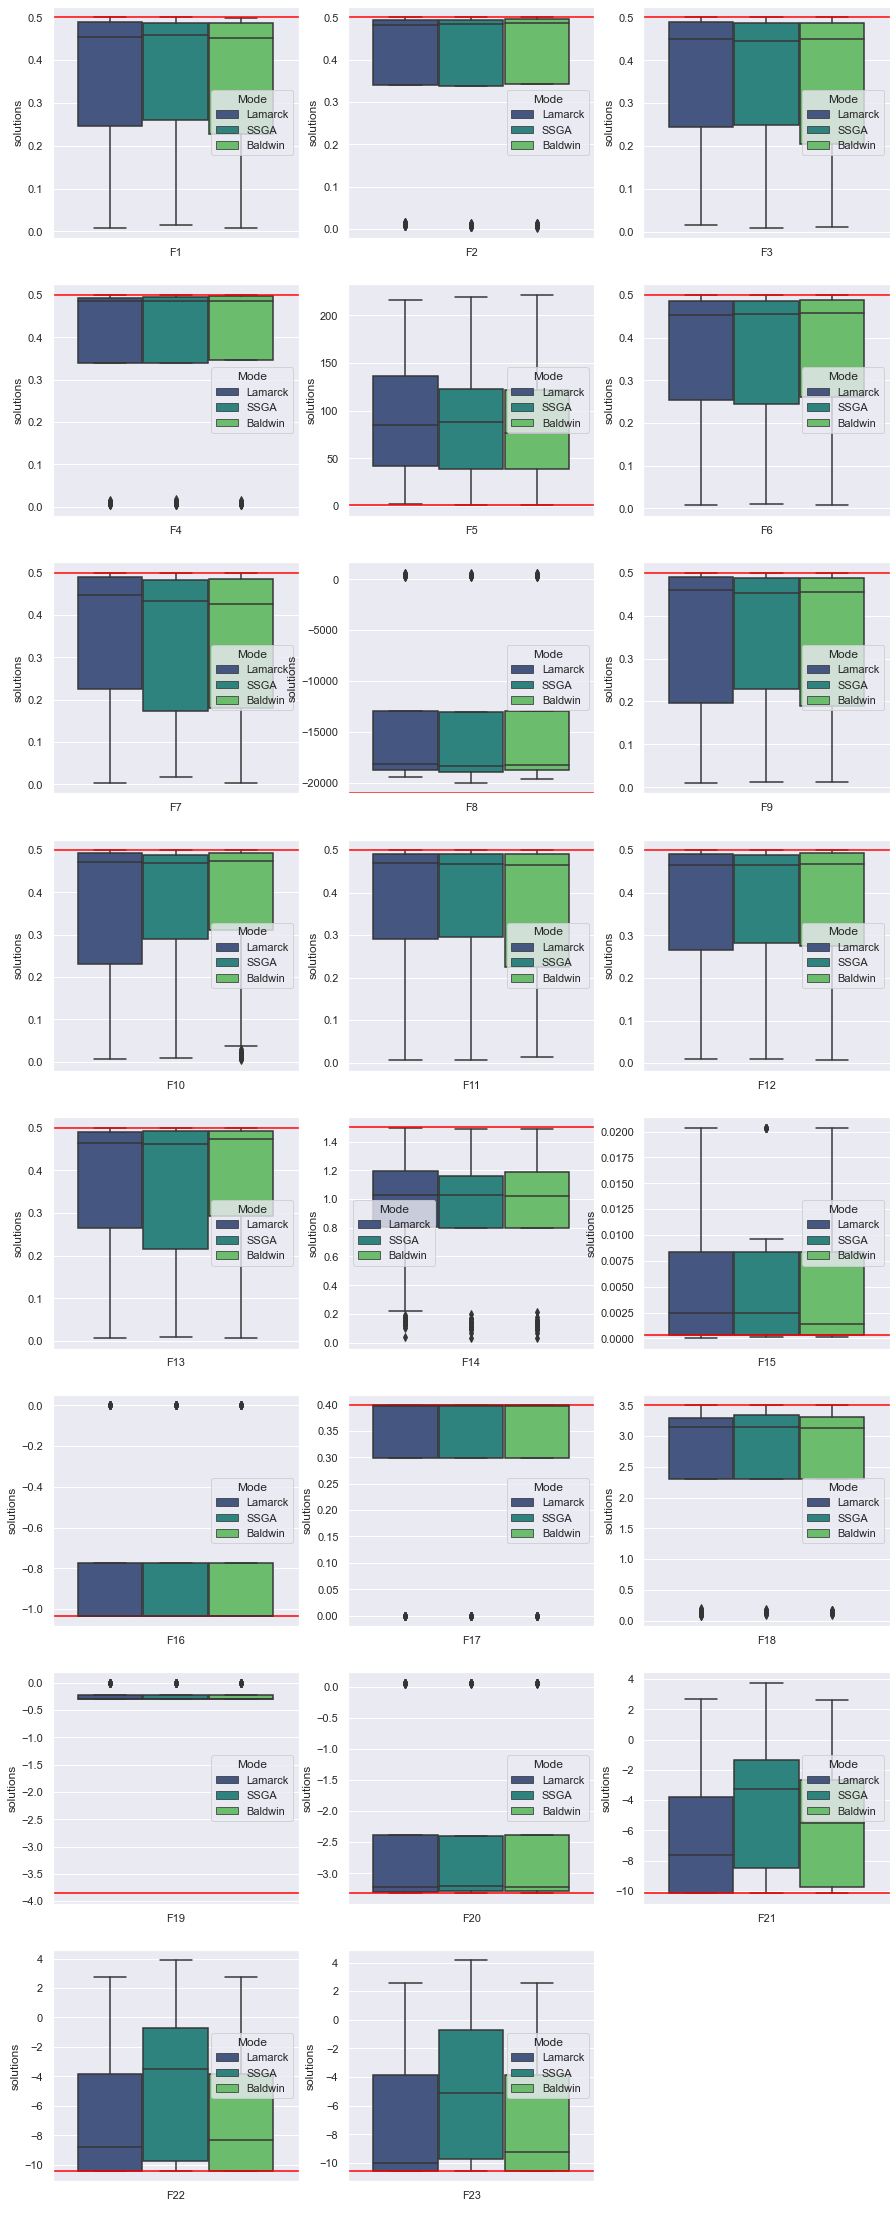

In [164]:
def show_graph(dataframe):
    sns.set()
    dist_cols = 3
    dist_rows = 8
    plt.figure(figsize=(5 * dist_cols, 5 * dist_rows))
    i = 1
    for function in function_list:
        dataf = dataframe[dataframe["Function"] == function]
        dataf2 = cdf[cdf["Function"] == function]
        plt.subplot(dist_rows, dist_cols, i)
        sns.boxplot(data=dataf, y="solutions", x="Function",hue="Mode",palette="viridis")
        # sns.scatterplot(data=dataf2,y="optimal",x="Function",color ="red")
        plt.axhline(y=global_opt[i-1],color="red")
        plt.xlabel(" ")
        plt.ylabel("solutions")
        i = i + 1
    plt.savefig("./together_solutions_optimal_{0}.pdf".format("lamarck_SSGA_Baldwin"), dpi=1200)
    plt.show()
show_graph(dataframe=dataframe)